# Budget Analysis

---

## Environment Setup

In [1]:
# Initial Imports
import os
import plaid
import requests
import datetime
import json
import pandas as pd
from dotenv import load_dotenv

%matplotlib inline

In [2]:
# Helper functions

def pretty_print_response(response):
    """
    This function formats a JSON file to pretty printing it in the screen.
    """
    print(json.dumps(response, indent=4, sort_keys=True))

In [3]:
# Set environment variables from the .env file
load_dotenv()

True

In [4]:
# Extract API keys from environment variables
PLAID_CLIENT_ID = os.getenv("PLAID_CLIENT_ID")
PLAID_SECRET = os.getenv("PLAID_SECRET")
PLAID_PUBLIC_KEY = os.getenv("PLAID_PUBLIC_KEY")

---

## Plaid Access Token

In this section, you will use the `plaid-python` API to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:

1. Create a client to connect to plaid

2. Use the client to generate a public token and request the following items: ['transactions', 'income', 'assets']

3. Exchange the public token for an access token

4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [5]:
# Create the client object
client = plaid.Client(client_id=PLAID_CLIENT_ID, 
                      secret=PLAID_SECRET,
                      public_key=PLAID_PUBLIC_KEY,
                      environment="sandbox" )


client.Institutions.get(1)

{'institutions': [{'country_codes': ['US'],
   'credentials': [{'label': 'Username', 'name': 'username', 'type': 'text'},
    {'label': 'Password', 'name': 'password', 'type': 'password'}],
   'has_mfa': True,
   'input_spec': 'fixed',
   'institution_id': 'ins_112060',
   'mfa': ['code', 'list', 'questions', 'selections'],
   'mfa_code_type': 'numeric',
   'name': '1st Bank (Broadus, MT) - Personal',
   'oauth': False,
   'products': ['assets',
    'auth',
    'balance',
    'transactions',
    'income',
    'identity'],
   'routing_numbers': []}],
 'request_id': 'zg0VOrU2EmGh8PE',
 'total': 11389}

In [6]:
# Set the institution id
INSITUTION_ID = "ins_109508"

### 2. Generate a public token

In [7]:
# Create the public token

create_token_response= client.Sandbox.public_token.create(INSITUTION_ID,['transactions', 'income', 'assets'])

# Print the public token
print(create_token_response)

{'public_token': 'public-sandbox-5581be04-24ef-427c-af96-a77b3538dcf0', 'request_id': 'ccnyUCRNOBVodmt'}


### 3. Exchange the public token for an access token

In [8]:
# Retrieve the access token

exchange_response= client.Item.public_token.exchange(create_token_response['public_token'])

# Print the access toke
print(exchange_response)

{'access_token': 'access-sandbox-20495455-e5ea-4f7d-83ec-0824b5234f9b', 'item_id': '5dMkd9PVEEI8jjxLo6lGcVmbqv4nMbuZdqyXP', 'request_id': '9SW32D2pE6t07ZP'}


In [9]:
# Store the access token in a Python variable
access_token=exchange_response['access_token']

### 4. Fetch Accounts

In [10]:
# Retrieve accounts

client.Accounts.get(access_token)
# Print accounts


{'accounts': [{'account_id': 'NljJlrvn11U477ApvGadIq6LkwwrgWHW6mWBm',
   'balances': {'available': 100,
    'current': 110,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '0000',
   'name': 'Plaid Checking',
   'official_name': 'Plaid Gold Standard 0% Interest Checking',
   'subtype': 'checking',
   'type': 'depository'},
  {'account_id': 'PKZJKBvEppIPjjqgB1wRs9VWvggzrMt76Z7BW',
   'balances': {'available': 200,
    'current': 210,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '1111',
   'name': 'Plaid Saving',
   'official_name': 'Plaid Silver Standard 0.1% Interest Saving',
   'subtype': 'savings',
   'type': 'depository'},
  {'account_id': 'jGmvG8BgVVHgZZKqjrmWSV3zGDDd81f1Wq1zA',
   'balances': {'available': None,
    'current': 1000,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '2222',
   'name': 'Plaid CD',
   'officia

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days

2. Print the categories for each transaction type

3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)

4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [11]:
# Set the start and end date 90 days from today
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now()) 
transactions_response = client.Transactions.get(access_token, start_date, end_date)

# Retrieve the transactions for the last 90 days

# Print the transactions
print(transactions_response)


{'accounts': [{'account_id': 'NljJlrvn11U477ApvGadIq6LkwwrgWHW6mWBm', 'balances': {'available': 100, 'current': 110, 'iso_currency_code': 'USD', 'limit': None, 'unofficial_currency_code': None}, 'mask': '0000', 'name': 'Plaid Checking', 'official_name': 'Plaid Gold Standard 0% Interest Checking', 'subtype': 'checking', 'type': 'depository'}, {'account_id': 'PKZJKBvEppIPjjqgB1wRs9VWvggzrMt76Z7BW', 'balances': {'available': 200, 'current': 210, 'iso_currency_code': 'USD', 'limit': None, 'unofficial_currency_code': None}, 'mask': '1111', 'name': 'Plaid Saving', 'official_name': 'Plaid Silver Standard 0.1% Interest Saving', 'subtype': 'savings', 'type': 'depository'}, {'account_id': 'jGmvG8BgVVHgZZKqjrmWSV3zGDDd81f1Wq1zA', 'balances': {'available': None, 'current': 1000, 'iso_currency_code': 'USD', 'limit': None, 'unofficial_currency_code': None}, 'mask': '2222', 'name': 'Plaid CD', 'official_name': 'Plaid Bronze Standard 0.2% Interest CD', 'subtype': 'cd', 'type': 'depository'}, {'account

### 2. Print the categories for each transaction

In [12]:
# Create a for-loop to print the categories for each transaction

df = pd.DataFrame(transactions_response['transactions'])
# df
df = df[['date','name', 'amount', 'category']]
df.columns
df


,date,name,amount,category
0,2020-06-11,McDonald's,12.00,"[Food and Drink, Restaurants, Fast Food]"
1,2020-06-11,Starbucks,4.33,"[Food and Drink, Restaurants, Coffee Shop]"
2,2020-06-10,SparkFun,89.40,"[Food and Drink, Restaurants]"
3,2020-06-09,INTRST PYMNT,-4.22,"[Transfer, Credit]"
4,2020-05-30,United Airlines,500.00,"[Travel, Airlines and Aviation Services]"
5,2020-05-28,Uber,6.33,"[Travel, Taxi]"
6,2020-05-25,Tectra Inc,500.00,"[Food and Drink, Restaurants]"
7,2020-05-24,AUTOMATIC PAYMENT - THANK,2078.50,[Payment]
8,2020-05-24,KFC,500.00,"[Food and Drink, Restaurants, Fast Food]"
9,2020-05-24,Madison Bicycle Shop,500.00,"[Shops, Sporting Goods]"


### 3. Create a new DataFrame using the following fields from the JSON transaction data: `date`, `name`, `amount`, `category`. 

(For categories with more than one label, just use the first category label in the list)

In [13]:
# Define an empty DataFrame and set the columns as date, name, amount, and category
trans_df = df.set_index('date')

trans_df.index = pd.to_datetime(trans_df.index)
trans_df.sort_index(inplace=True)
# Retrieve all the transactions
trans_df.loc[:, 'new_col'] =trans_df.category.map(lambda x: x[0])
# trans_df['category'] = trans_df['new_col']
del trans_df['category']
trans_df.rename(columns={'new_col':'categories'},inplace=True)

trans_df
# Populate the transactions DataFrame with the transactions data

# Display sample data from the DataFrame    


,name,amount,categories
date,,,
2020-03-13,Starbucks,4.33,Food and Drink
2020-03-13,McDonald's,12.00,Food and Drink
2020-03-14,Touchstone Climbing,78.50,Recreation
2020-03-14,United Airlines,-500.00,Travel
2020-03-15,CD DEPOSIT .INITIAL.,1000.00,Transfer
2020-03-15,ACH Electronic CreditGUSTO PAY 123456,5850.00,Transfer
2020-03-16,Uber,5.40,Travel
2020-03-16,CREDIT CARD 3333 PAYMENT *//,25.00,Payment
2020-03-25,Madison Bicycle Shop,500.00,Shops


### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [14]:
# Display data types
trans_df["amount"] = pd.to_numeric(trans_df.amount, errors= 'coerce')

trans_df['amount']

date
2020-03-13       4.33
2020-03-13      12.00
2020-03-14      78.50
2020-03-14    -500.00
2020-03-15    1000.00
2020-03-15    5850.00
2020-03-16       5.40
2020-03-16      25.00
2020-03-25     500.00
2020-03-25     500.00
2020-03-25    2078.50
2020-03-26     500.00
2020-03-29       6.33
2020-03-31     500.00
2020-04-10      -4.22
2020-04-11      89.40
2020-04-12       4.33
2020-04-12      12.00
2020-04-13    -500.00
2020-04-13      78.50
2020-04-14    1000.00
2020-04-14    5850.00
2020-04-15       5.40
2020-04-15      25.00
2020-04-24     500.00
2020-04-24     500.00
2020-04-24    2078.50
2020-04-25     500.00
2020-04-28       6.33
2020-04-30     500.00
2020-05-10      -4.22
2020-05-11      89.40
2020-05-12       4.33
2020-05-12      12.00
2020-05-13    -500.00
2020-05-13      78.50
2020-05-14    1000.00
2020-05-14    5850.00
2020-05-15       5.40
2020-05-15      25.00
2020-05-24     500.00
2020-05-24     500.00
2020-05-24    2078.50
2020-05-25     500.00
2020-05-28       6.33
2020-

In [15]:
# Make any required data type transformation
trans_df.head()

,name,amount,categories
date,,,
2020-03-13,Starbucks,4.33,Food and Drink
2020-03-13,McDonald's,12.00,Food and Drink
2020-03-14,Touchstone Climbing,78.50,Recreation
2020-03-14,United Airlines,-500.00,Travel
2020-03-15,CD DEPOSIT .INITIAL.,1000.00,Transfer


In [16]:
# Set the date column as index

# Display sample data


---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:

1. Determine the previous year's gross income and print the results

2. Determine the current monthly income and print the results

3. Determine the projected yearly income and print the results

In [17]:
# Fetch de income data

# Print the income data
client.Income.get(access_token)

{'income': {'income_streams': [{'confidence': 0.99,
    'days': 690,
    'monthly_income': 500,
    'name': 'UNITED AIRLINES'}],
  'last_year_income': 6000,
  'last_year_income_before_tax': 7285,
  'max_number_of_overlapping_income_streams': 1,
  'number_of_income_streams': 1,
  'projected_yearly_income': 6085,
  'projected_yearly_income_before_tax': 7389},
 'request_id': 'oaZFdgqeW9piEyA'}

In [18]:
# Determine the previous year's gross income and print the results
income_response = client.Income.get(access_token)
print(income_response)

last_income_data = income_response['income']['projected_yearly_income_before_tax']
igy=last_income_data



print(f"Last year, this mans yearly Gross income is an abysmal: ${igy}")

{'income': {'income_streams': [{'confidence': 0.99, 'days': 690, 'monthly_income': 500, 'name': 'UNITED AIRLINES'}], 'last_year_income': 6000, 'last_year_income_before_tax': 7285, 'max_number_of_overlapping_income_streams': 1, 'number_of_income_streams': 1, 'projected_yearly_income': 6085, 'projected_yearly_income_before_tax': 7389}, 'request_id': 'tcuU4P19qRa0yGT'}
Last year, this mans yearly Gross income is an abysmal: $7389


In [19]:
# Determine the current monthly income and print the results
income_monthly = income_response['income']['income_streams'][0]['monthly_income']
im = income_monthly

print(f"This mans monthly income is an abysmal: ${im}")

This mans monthly income is an abysmal: $500


In [20]:
# Determine the projected yearly income and print the results
yearly_data = income_response['income']['projected_yearly_income']
iy = yearly_data

print(f"This mans yearly income is an abysmal: ${iy}")

This mans yearly income is an abysmal: $6085


---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)

2. Generate a bar chart with the number of transactions for each category

3. Calulate the expenses per month

4. Plot the total expenses per month

### Calculate the expenses per category

In [34]:
# Compute the total expenses per category
grp_spending = trans_df.groupby(trans_df.categories)['amount'].sum()
grp_spending


categories
Food and Drink     3333.52
Payment            6310.50
Recreation          235.50
Shops              1500.00
Transfer          20537.34
Travel               35.19
Name: amount, dtype: float64

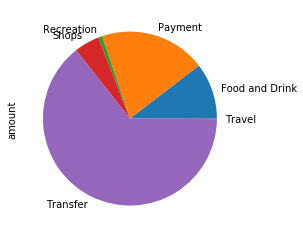

In [22]:
# Create a spending categories pie chart.
grp_spending.plot(kind='pie')

### Calculate the expenses per month

In [36]:
# Create a DataFrame with the total expenses

# Display sample data
df_amounts = trans_df.filter(['date', 'amount'])
mogroup= df_amounts.groupby(df_amounts.index.month).sum()
print(f"Expenses by month: {mogroup}")
# df_amounts
mogroup



Expenses by month:         amount
date          
3     10560.06
4     10645.24
5     10645.24
6       101.51


,amount
date,
3,10560.06
4,10645.24
5,10645.24
6,101.51


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11ee70fd0>],
      dtype=object)

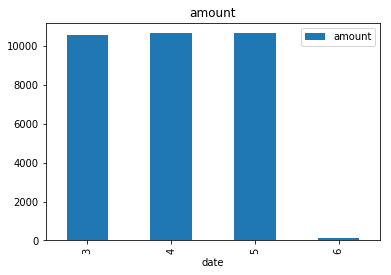

In [27]:
# Create a spending per month bar chart
mogroup.plot(kind='bar',subplots=True)

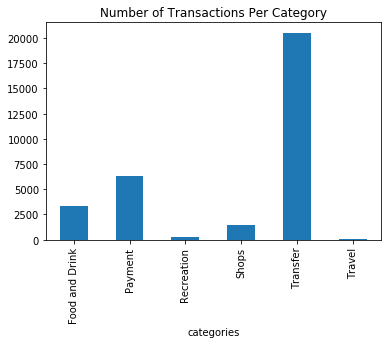

In [28]:
grp_spending.plot(kind = 'bar', title = 'Number of Transactions Per Category')